In [3]:
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy as sp

from scipy import ndimage
from shutil import copyfile
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


   
# Preprocesamiento de datos


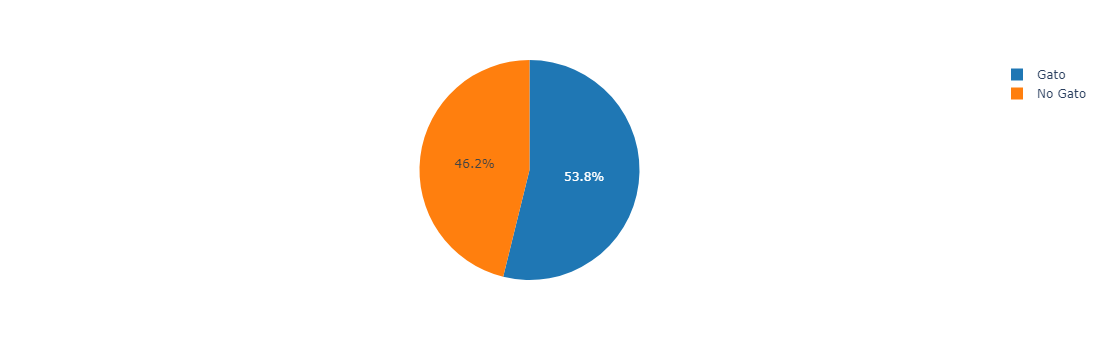

In [11]:
import plotly.express as px

# Definir clases y valores
class_names = ['Gato', 'No Gato']
n_nogato = len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/gatos'))
n_gatos = len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/nogatos'))

n_images = [n_gatos, n_nogato]

# Definir una secuencia de colores personalizados
colores_personalizados = ["#1f77b4", "#ff7f0e"]  # Azul y Naranja

# Crear gráfica con colores personalizados
fig = px.pie(
    names=class_names,
    values=n_images,
   # title="Distribución de imágenes de Gatos y No Gatos",
    color_discrete_sequence=colores_personalizados
)

fig.show()

In [7]:
#Define data path
CAT_DIR = 'C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/gatos'
DOG_DIR = 'C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/nogatos'

TRAINING_DIR   = "C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/training/"
VALIDATION_DIR = "C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/validacion/"
TEST_DIR = "C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/test/"

TRAINING_CATS   = os.path.join(TRAINING_DIR,   "gatos/")
VALIDATION_CATS = os.path.join(VALIDATION_DIR, "gatos/")
TEST_CATS = os.path.join(TEST_DIR, "gatos/")

TRAINING_NOCATS   = os.path.join(TRAINING_DIR,   "nogatos/")
VALIDATION_NOCATS = os.path.join(VALIDATION_DIR, "nogatos/")
TEST_NOCATS = os.path.join(TEST_DIR, "nogatos/")

# Define whether to include test split or not
INCLUDE_TEST = True

In [8]:
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/training/gatos')))
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/training/nogatos')))

print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/validacion/gatos')))
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5//Imagenes/dataset/tmp/gatosNogatos/validacion/nogatos')))

print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/test/gatos')))
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/test/nogatos')))

23
18
8
14
10
15


**
Ahora creemos una función para dividir los datos.**

In [9]:
def split_data(main_dir, training_dir, validation_dir, test_dir=None, include_test_split = True,  split_size=0.9):
    """
    Divide los datos en conjuntos de prueba y validación

    Args:
    main_dir (string):  ruta que contiene las imágenes
    training_dir (string):  path que se utilizará para el entrenamiento
    validation_dir (string):  path que se utilizará para el validacion
    test_dir (string):  path que se utilizará para la prueba
    include_test_split (boolen):  si incluir una división de prueba o no
    split_size (float): Tamaño del conjunto de datos que se utilizará para el entrenamiento.
    """
    files = []
    for file in os.listdir(main_dir):
        if  os.path.getsize(os.path.join(main_dir, file)): # comprobar si el tamaño del archivo no es 0
            files.append(file) # agrega el nombre del archivo a una lista

    shuffled_files = random.sample(files,  len(files)) # shuffles datos
    split = int(0.9 * len(shuffled_files)) # la división de entrenamiento convertida en int para redondeo numérico
    train = shuffled_files[:split] # división de entrenamiento
    split_valid_test = int(split + (len(shuffled_files)-split)/2)
   
    if include_test_split:
        validation = shuffled_files[split:split_valid_test] # división de validación
        test = shuffled_files[split_valid_test:]
    else:
        validation = shuffled_files[split:]

    for element in train:
        copyfile(os.path.join(main_dir,  element), os.path.join(training_dir, element)) # copiar archivos al directorio entreanmiento

    for element in validation:
        copyfile(os.path.join(main_dir,  element), os.path.join(validation_dir, element))# copiar archivos al directorio validacion
        
    if include_test_split:
        for element in test:
            copyfile(os.path.join(main_dir,  element), os.path.join(test_dir, element)) # copiar archivos al directorio prueba
    print("Split sucessful!")

**crear los datos de entrenamiento/validación**

In [10]:
split_data(CAT_DIR, TRAINING_CATS, VALIDATION_CATS, TEST_CATS,INCLUDE_TEST, 0.9)
split_data(CAT_DIR, TRAINING_NOCATS, VALIDATION_NOCATS, TEST_NOCATS, INCLUDE_TEST, 0.9)

Split sucessful!
Split sucessful!


**directorios de datos**

In [11]:
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/training/gatos')))
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/training/nogatos')))

print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/validacion/gatos')))
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/validacion/nogatos')))

print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/test/gatos')))
print(len(os.listdir('C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/test/nogatos')))

23
20
8
14
10
16


### Crear generadores

In [12]:
#Crea un generador de imágenes que normaliza los valores de los píxeles dividiéndolos por 255
train_gen      =  ImageDataGenerator(rescale=1./255.)

# flow_from_directory cargar las imágenes de entrenamiento en mini-lotes (batches) 
# target_size - el tamaño al que se redimensionarán todas las imágenes antes de alimentarlas al modelo.
# batch_size lote de imágenes se generarán y procesarán en cada iteración
# clase binaria 0 o 1 
train_generator = train_gen.flow_from_directory(
        'C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/training',
        target_size=(150, 150),
        batch_size=64,   
        class_mode='binary')
 
validation_gen =  ImageDataGenerator(rescale=1./255.)
validation_generator = validation_gen.flow_from_directory(
        'C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/validacion',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary') 

if INCLUDE_TEST:
    test_gen   =  ImageDataGenerator(rescale=1./255.)
#es una variable de control para decidir si se incluye el conjunto de prueba en el flujo de trabajo.
if INCLUDE_TEST:
    test_generator = test_gen.flow_from_directory(
        'C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/test',
        target_size=(150, 150),
        batch_size=64,
        class_mode='binary')

Found 43 images belonging to 2 classes.
Found 22 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [13]:
class_names =  ['Gato', 'No Gato']

def plot_data(generator, n_images):
    i = 1
    # Usa next() en lugar de generator.next()
    images, labels = next(generator)
    labels = labels.astype('int32')

    plt.figure(figsize=(14, 15))
    for i in range(n_images):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"No es Gato: {labels[i]}")
        plt.axis("off")
    plt.show()

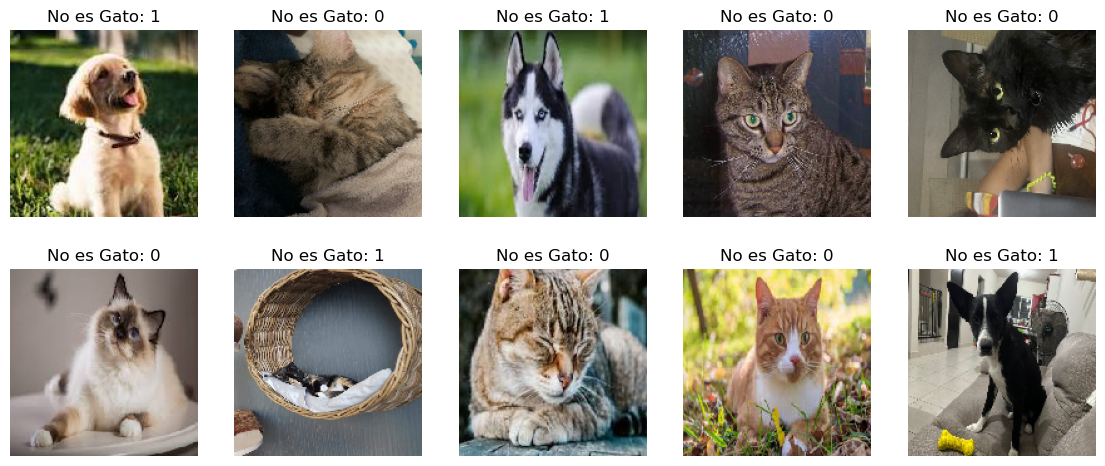

In [14]:
plot_data(train_generator,10)

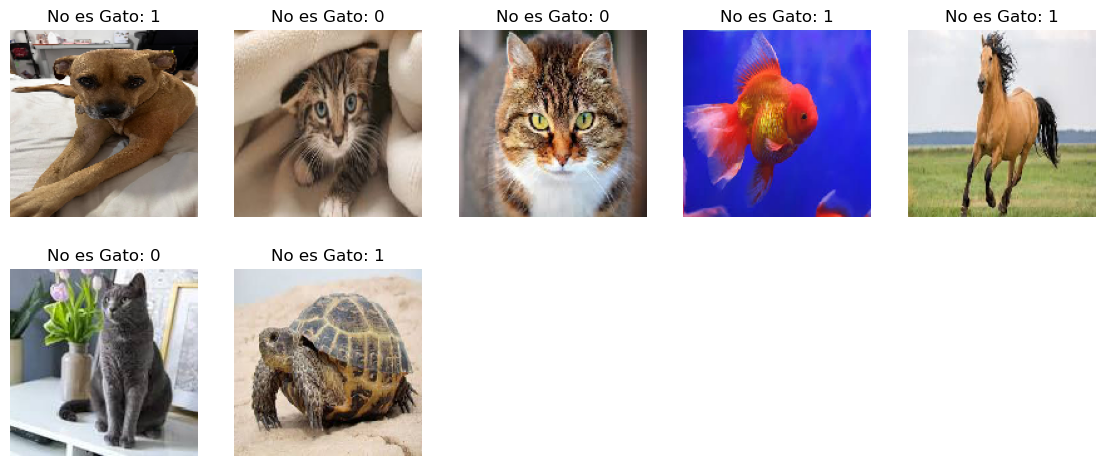

In [15]:
plot_data(validation_generator,7)

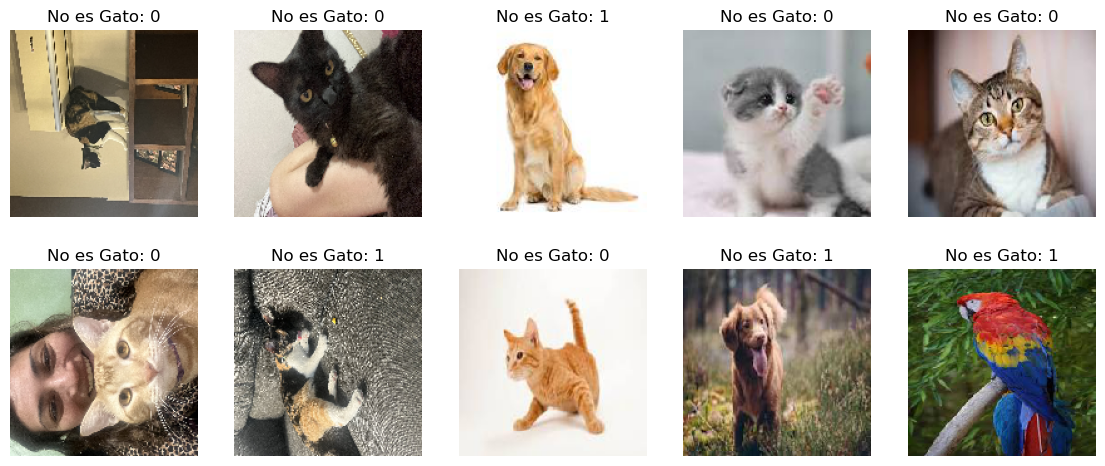

In [17]:
if INCLUDE_TEST:
    plot_data(test_generator, 10)

# Modelo
# Red neuronal convolucional (CNN)

In [18]:
#Entrada: Una imagen de tamaño (150, 150, 3).
#Capas convolucionales: Extraen características de la imagen (bordes, texturas, formas).
#Capas de pooling: Reducen el tamaño espacial, conservando las características más importantes.
#Capa de pooling global: Resume las características por canal.
#Capa densa: Aprende representaciones de alto nivel.
#Capa de salida: Calcula probabilidades para las clases Gato y No Gato.

# tamaño de 150x150 píxeles con 3 canales (imágenes en color RGB).
inputs = tf.keras.layers.Input(shape=(150,150,3))  
#capa 1,  cuadritos(convolución) 32  tamaño cuadro 3x3 
#Añade 32 filtros de convolución, cada uno con un tamaño de 3x3 píxeles.
#función de activación ReLU para introducir no linealidad. 
#Esta capa aprende características como bordes y texturas de bajo nivel en las imágenes.
x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
#capa 2
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
#Reducen el tamaño espacial, conservando las características más importantes
x = tf.keras.layers.MaxPooling2D(2,2)(x)
#capa 3
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
#capa 4
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
#capa 5
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
#Reduce la salida,  con las caracteristicas principales de la imagen
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x) #1024 neuronas
x = tf.keras.layers.Dense(2, activation='softmax')(x) #  2 neuronas, una para cada clase. # probabilidades gato /no gato 

model = Model(inputs=inputs, outputs=x)

In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,146 (3.20 MB)

 Trainable params: 838,146 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [21]:
r = model.fit(
        train_generator,
        epochs=10,#Training longer could yield better results
        validation_data=validation_generator)

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5349 - loss: 0.6927 - val_accuracy: 0.3636 - val_loss: 0.7257
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5349 - loss: 0.6878 - val_accuracy: 0.3636 - val_loss: 0.7450
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.5349 - loss: 0.6849 - val_accuracy: 0.3636 - val_loss: 0.7019
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5349 - loss: 0.6871 - val_accuracy: 0.3636 - val_loss: 0.9631
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5349 - loss: 0.7412 - val_accuracy: 0.6364 - val_loss: 0.6867
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4651 - loss: 0.6952 - val_accuracy: 0.6364 - val_loss: 0.6921
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4651 - loss: 0.6932 - val_accuracy: 0.3636 - val_loss: 0.6962
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5349 - loss: 0.6916 - val_accuracy: 0.3636 - val_loss: 0.7009
Epoch 9/10
1

# Evaluacion

## Evaluar el modelo en el conjunto de prueba.

In [22]:
if INCLUDE_TEST:
    model.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3846 - loss: 0.7025


<a name="4-2"></a>

## Visualiza las predicciones

In [23]:
def plot_prediction(generator, n_images):
    """
    Test the model on random predictions
    Args:
    generator: a generator instance
    n_images : number of images to plot

    """
    i = 1
    # Get the images and the labels from the generator
    images, labels =  next(generator)
    # Gets the model predictions
    preds = model.predict(images)
    predictions = np.argmax(preds, axis=1)
    labels = labels.astype('int32')
    plt.figure(figsize=(14, 15))
    for image, label in zip(images, labels):
        plt.subplot(4, 3, i)
        plt.imshow(image)
        if predictions[i] == labels[i]:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='g') 
            plt.axis('off')
        else:
            title_obj = plt.title(class_names[label])
            plt.setp(title_obj, color='r') 
            plt.axis('off')
        i += 1
        if i == n_images:
            break
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step


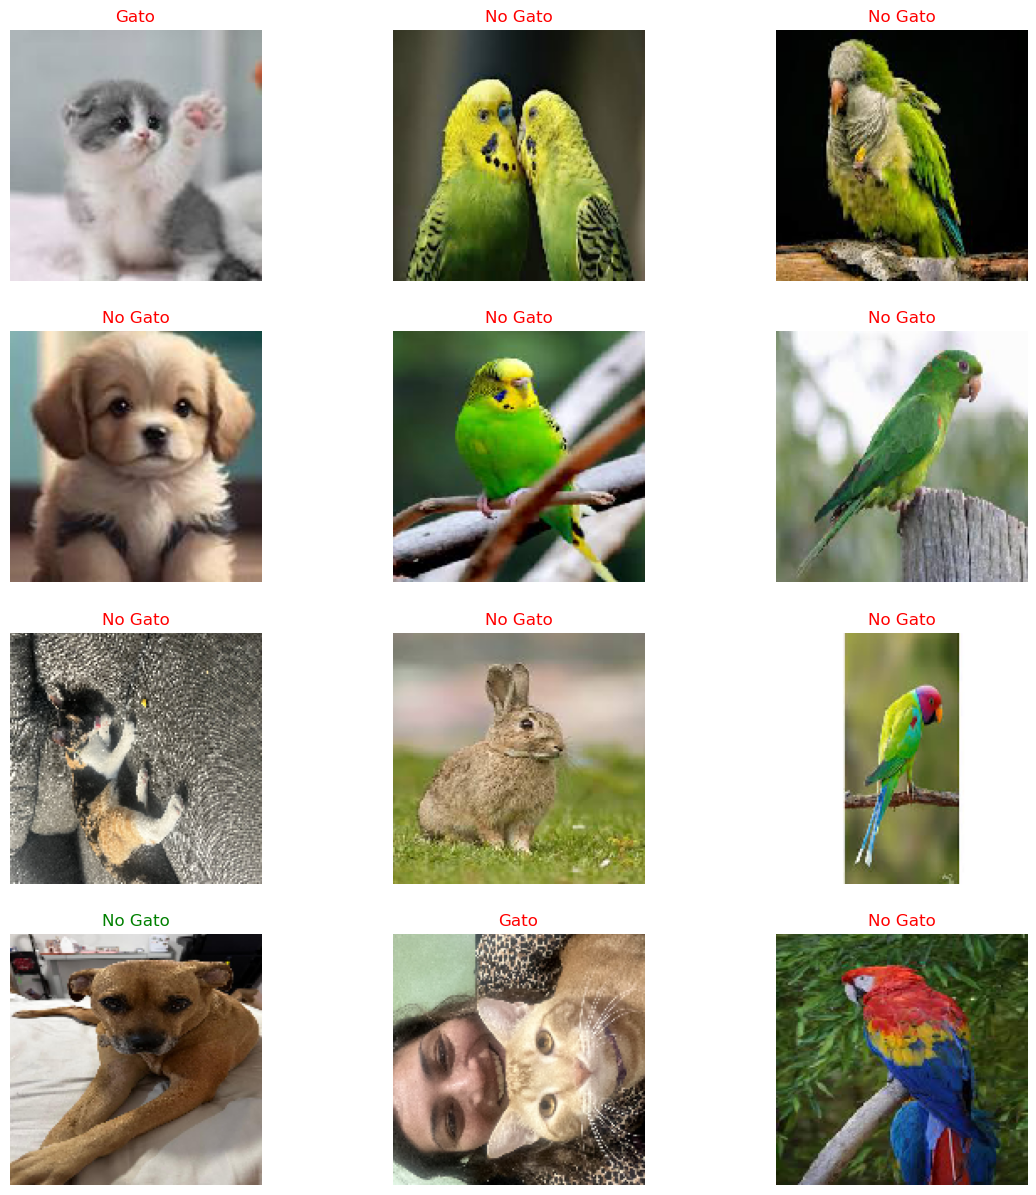

In [24]:
if INCLUDE_TEST:
    plot_prediction(test_generator, 13)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step


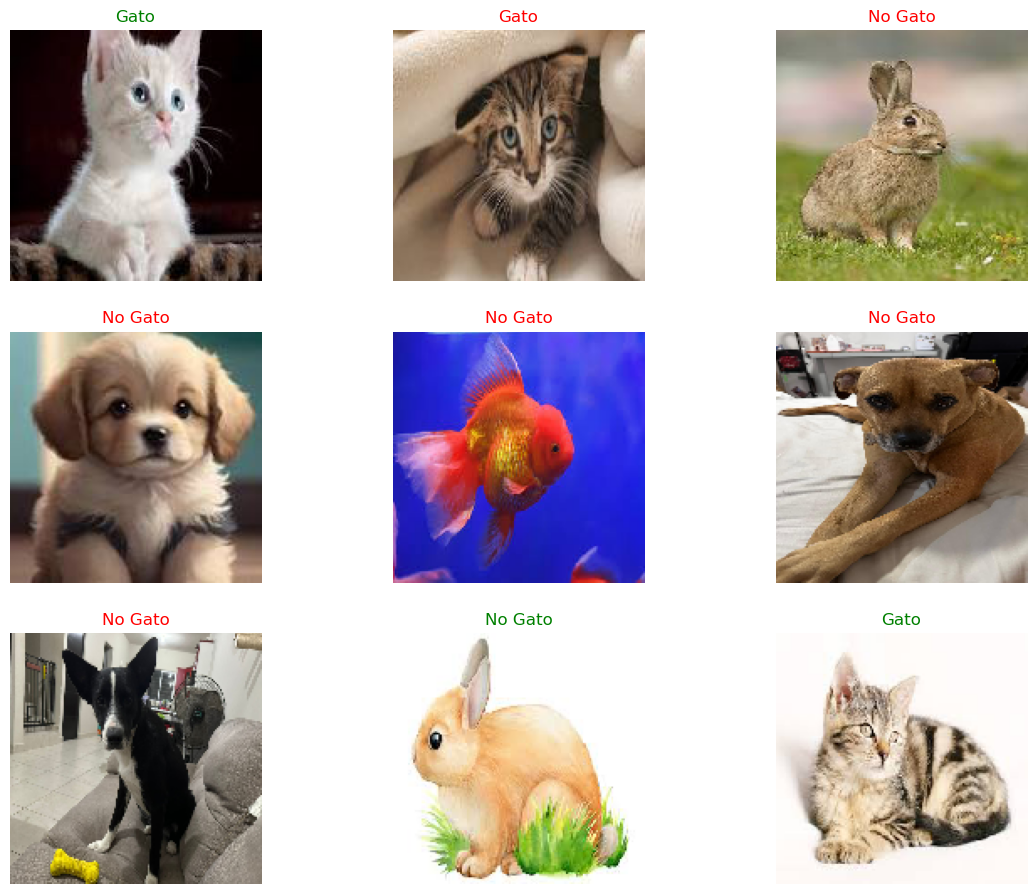

In [25]:
plot_prediction(validation_generator, 10)

### Visualizar mapas de activación de clases

In [26]:
# Create a  model to visualize activation maps
gp_weights =  model.get_layer('dense').get_weights()[0]
activation_model = Model(model.inputs, outputs=(model.get_layer('conv2d_5').output, model.get_layer('dense_1').output))

In [27]:
# Use the model to make predictions on the test generator
# Usa next() en lugar de test_generator.next()
images, _ = next(test_generator)
features, results = activation_model.predict(images)


C:\Users\PC\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [28]:
def show_cam(image_index, features, results):
    """
    Shows activation maps
    Args:
    image_index: index of image
    features: the extracted features
    results: model's predictions
    """
    # takes the features of the chosen image
    features_for_img = features[image_index,:,:,:]

    # get the class with the highest output probability
    prediction = np.argmax(results[image_index])

    # get the gap weights at the predicted class
    class_activation_weights = gp_weights[:,prediction]

    # upsample the features to the image's original size (150 x 150)
    class_activation_features = sp.ndimage.zoom(features_for_img, (150/30, 150/30, 1), order=2)

    # compute the intensity of each feature in the CAM
    cam_output  = np.dot(class_activation_features,class_activation_weights)

    print('Predicted Class = ' +str(class_names[prediction])+ ', Probability = ' + str(results[image_index][prediction]))

    # show the upsampled image
    
    plt.imshow(images[image_index])

    # strongly classified (95% probability) images will be in green, else red
    if results[image_index][prediction]>0.95:
        cmap_str = 'Greens'
    else:
        cmap_str = 'Blues'

    # overlay the cam output
    plt.imshow(cam_output, cmap=cmap_str, alpha=0.5)

    # display the image
    plt.show()

In [29]:
def show_maps(desired_class=1, num_maps=5):
    counter = 0
    for i in range(len(results)):  # Limita el rango a la longitud de results
        if counter >= num_maps:  # Si ya se han mostrado los mapas deseados, termina el bucle
            break

        # Muestra las imágenes que coinciden con la clase deseada
        if np.argmax(results[i]) == desired_class:
            counter += 1
            show_cam(i, features, results)


In [30]:
show_maps(desired_class=1, num_maps=5)

Predicted Class = Gato, Probability = 0.5263005


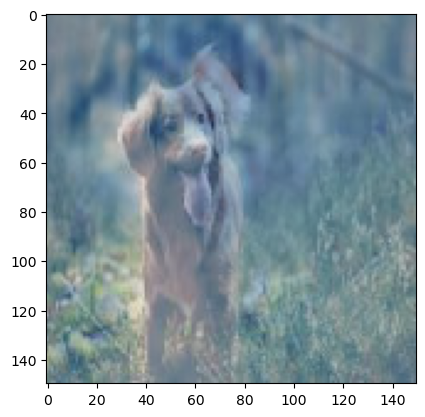

Predicted Class = Gato, Probability = 0.5161187


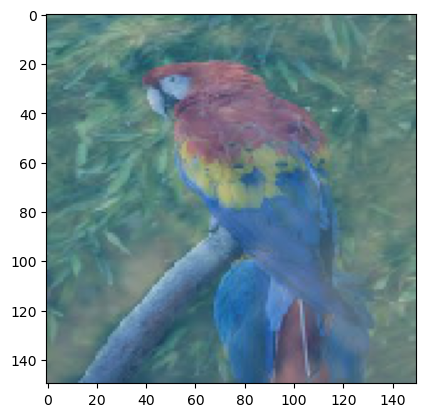

Predicted Class = Gato, Probability = 0.52684456


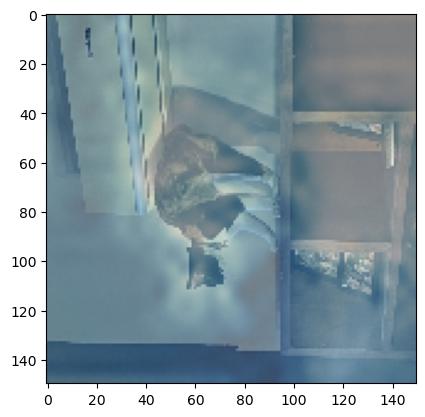

Predicted Class = Gato, Probability = 0.5262805


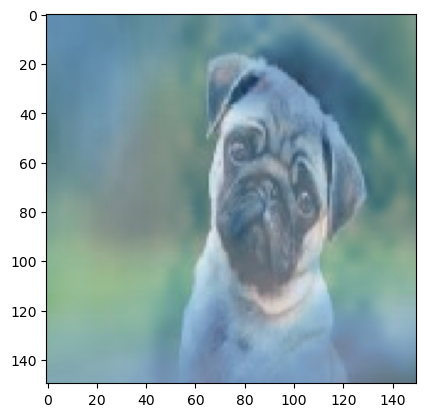

Predicted Class = Gato, Probability = 0.5308213


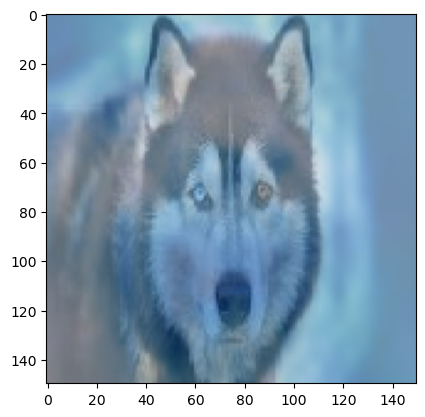

In [31]:
show_maps(desired_class=0, num_maps=5)

<a name="4-4"></a>

## Visualize training process

In [32]:
results = pd.DataFrame(r.history)
results.tail()

accuracy      loss  val_accuracy  val_loss
5  0.465116  0.695228      0.636364  0.692099
6  0.465116  0.693177      0.363636  0.696226
7  0.534884  0.691650      0.363636  0.700901
8  0.534884  0.690250      0.363636  0.704760
9  0.534884  0.688690      0.363636  0.709861

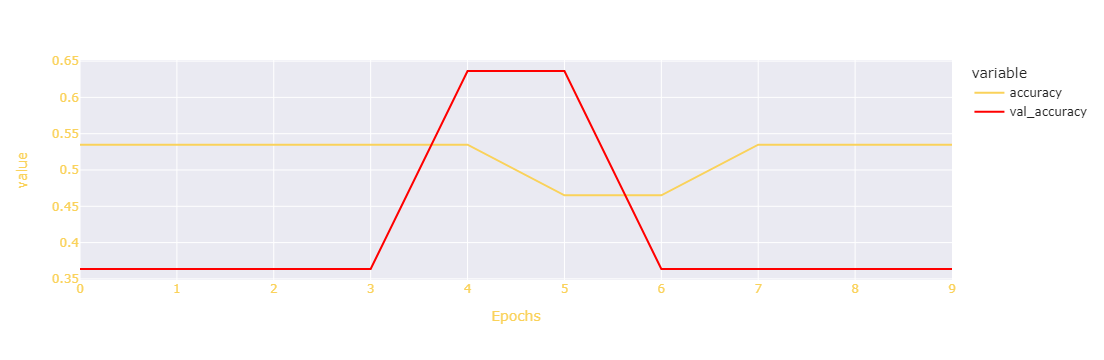

In [33]:
fig = px.line(results,y=[results['accuracy'],results['val_accuracy']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(   
    title_font_color="#fad25a", 
    xaxis=dict(color="#fad25a",title='Epochs'), 
    yaxis=dict(color="#fad25a")
 )
fig.show()

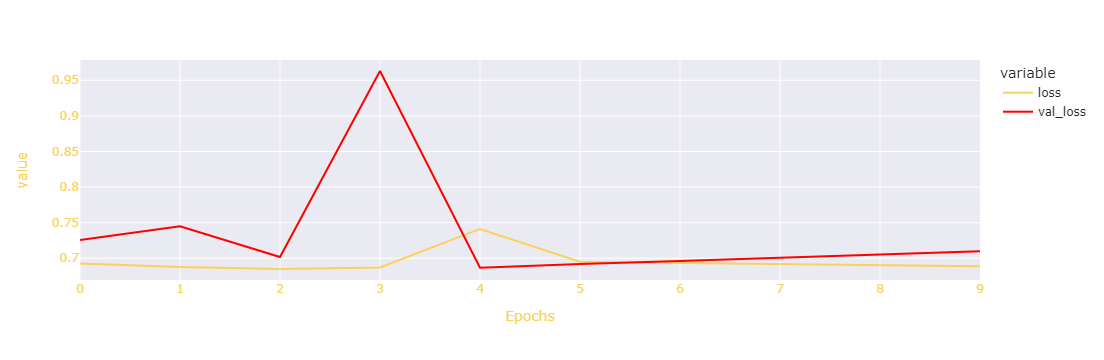

In [34]:
fig = px.line(results,y=[results['loss'],results['val_loss']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(   
    title_font_color="#fad25a", 
    xaxis=dict(color="#fad25a",title='Epochs'), 
    yaxis=dict(color="#fad25a")
 )
fig.show()

## Modificando parametros

In [35]:
train_gen_aug = ImageDataGenerator(
        rescale=1./255,fill_mode='nearest',horizontal_flip=True,
        rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)


validation_gen_aug =  ImageDataGenerator(
        rescale=1./255.)


In [36]:
train_generator = train_gen_aug.flow_from_directory(
        'C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/training',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
validation_generator = validation_gen_aug.flow_from_directory(
        'C:/Users/PC/Documents/Procesamiento y Clasificacion de  Datos/PC_Datos/tarea/Tarea 5/Imagenes/dataset/tmp/gatosNogatos/validacion',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 43 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [37]:
inputs = tf.keras.layers.Input(shape=(150,150,3))
x =  tf.keras.layers.Conv2D(32, (3,3), activation='relu')(inputs)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)

x = tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x = tf.keras.layers.Conv2D(256, (3,3), activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2,2)(x)


x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x) 
x = tf.keras.layers.Dense(2, activation='softmax')(x) 

model_aug = Model(inputs=inputs, outputs=x)

In [38]:
model_aug.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [39]:
r = model_aug.fit(
        train_generator,
        epochs=10,#Training longer could yield better results
        validation_data=validation_generator)

C:\Users\PC\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.5545 - loss: 4.3236 - val_accuracy: 0.6364 - val_loss: 0.7509
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 9s/step - accuracy: 0.4919 - loss: 0.7726 - val_accuracy: 0.3636 - val_loss: 1.3296
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5596 - loss: 0.8719 - val_accuracy: 0.6364 - val_loss: 0.6497
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 8s/step - accuracy: 0.4919 - loss: 0.6944 - val_accuracy: 0.3636 - val_loss: 0.7039
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5545 - loss: 0.6911 - val_accuracy: 0.6364 - val_loss: 0.6644
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5182 - loss: 0.7311 - val_accuracy: 0.3636 - val_loss: 0.7057
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 6s/step - accuracy: 0.5990 - loss: 0.6877 - val_accuracy: 0.3636 - val_loss: 0.7116
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.5441 - loss: 0.6868 - val_accuracy: 0.6364 - val_loss: 0.6438
Epoch 9/1

In [40]:
results = pd.DataFrame(r.history)
results.tail()

accuracy      loss  val_accuracy  val_loss
5  0.511628  0.727318      0.363636  0.705685
6  0.534884  0.694176      0.363636  0.711645
7  0.534884  0.687482      0.636364  0.643752
8  0.465116  0.706366      0.363636  0.728381
9  0.534884  0.696152      0.363636  0.714324

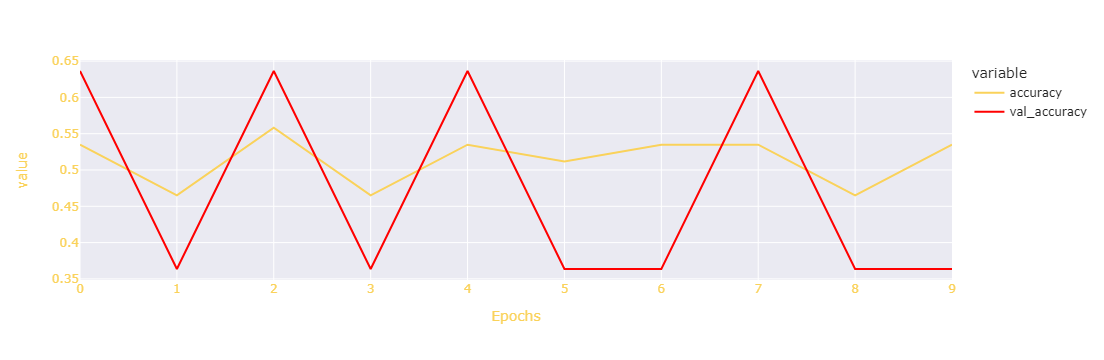

In [41]:
fig = px.line(results,y=[results['accuracy'],results['val_accuracy']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(   
    title_font_color="#fad25a", 
    xaxis=dict(color="#fad25a",title='Epochs'), 
    yaxis=dict(color="#fad25a")
 )
fig.show()

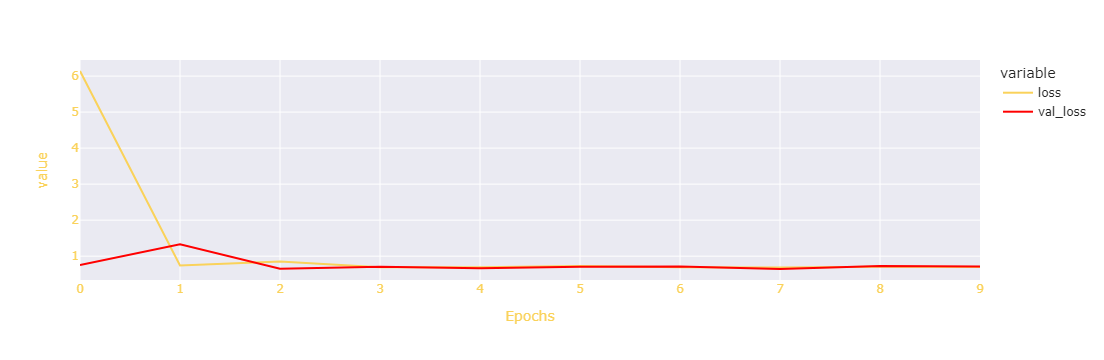

In [42]:
fig = px.line(results,y=[results['loss'],results['val_loss']],template="seaborn",color_discrete_sequence=['#fad25a','red'])
fig.update_layout(   
    title_font_color="#fad25a", 
    xaxis=dict(color="#fad25a",title='Epochs'), 
    yaxis=dict(color="#fad25a")
 )
fig.show()